# importing liberaries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

###### importing Dataset

In [4]:
# load the dat frm csv file to pandas file
titanic_data = pd.read_csv("titanic.csv")

In [5]:
#rint first 5 rowos of DataFrame
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# numbers of rows and olumn
titanic_data.shape

(891, 12)

In [10]:
#getting information about DataFrame
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#check the number of missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### Handling the missing Values

In [16]:
#drop the "cabin" column as it has a lot of missing values and ts type is object
titanic_data= titanic_data.drop(columns ='Cabin',axis=1)


In [17]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [19]:
#repalcing the missing values in age column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [20]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [21]:
#finding the mode value for Embarked column
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [22]:
#replacing missing values in Embarked column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [23]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###### getting statistical description about DataFrame

In [24]:
# getting full description of data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#finding the bnumber of people survived or not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

###### Data Visualisation

In [30]:
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

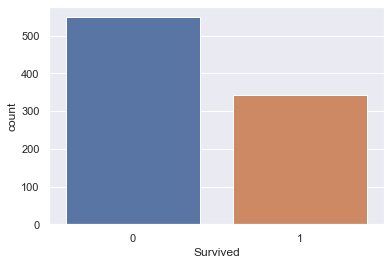

In [31]:
#making a countplot for "Survived" column
sns.countplot('Survived', data = titanic_data)

In [33]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

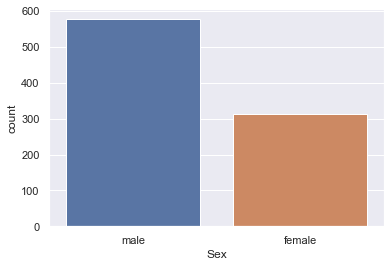

In [34]:
sns.countplot('Sex', data = titanic_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

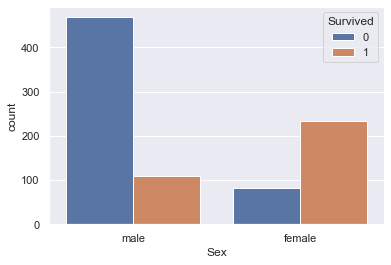

In [36]:
#number of Survived based on gender wise
sns.countplot('Sex',hue= 'Survived', data = titanic_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

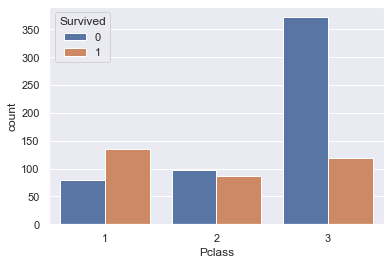

In [38]:
#number of Pclass based on Survived one
sns.countplot('Pclass',hue= 'Survived', data = titanic_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

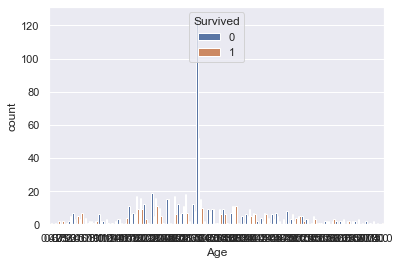

In [39]:
#number of Age based on Survived one
sns.countplot('Age',hue= 'Survived', data = titanic_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

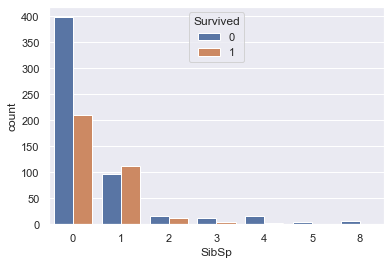

In [40]:
#number of SibSp based on Survived one
sns.countplot('SibSp',hue= 'Survived', data = titanic_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

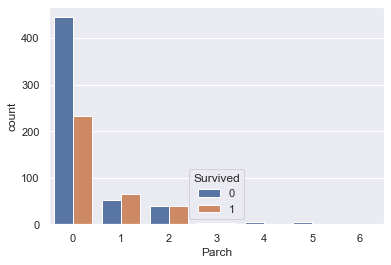

In [41]:
#number of Parch based on Survived one
sns.countplot('Parch',hue= 'Survived', data = titanic_data)

In [42]:

titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [43]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

##### Encoding Categorical

In [46]:
#encoding Categorical column
titanic_data.replace({"Sex":{'male':0,'female' :1},'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

In [47]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


###### seperating features and Target

In [48]:
X= titanic_data.drop(columns=['PassengerId','Name','Ticket','Ticket'],axis=1)
Y = titanic_data['Survived']


In [50]:
X


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [51]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

###### splitting the data into training data and test data

In [75]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.4,random_state=3)

In [76]:
print(X.shape,X_train.shape,X_test.shape)

(891, 8) (534, 8) (357, 8)


###### Model training of Data

##### Logistic Regression

In [77]:
model= LogisticRegression()

In [78]:
#training the LogisticRegresson Model with Training data
model.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#model Evaluation
Accuracy score

In [79]:
#accuracy on training Data
X_train_prediction = model.predict(X_train)


In [80]:
print(X_train_prediction)

[0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 

In [81]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)


In [71]:
print('Accuracy score of training data:',training_data_accuracy)

Accuracy score of training data: 1.0


In [82]:
#accuracy on test Data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1
 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1
 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0]


In [83]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [84]:
print('Accuracy score of testing data:',test_data_accuracy)

Accuracy score of testing data: 1.0
